In [1]:
import random
import pandas as pd
import os

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image, ImageFilter


import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import keras
import cv2

import keras.utils as np_utils

Using TensorFlow backend.


In [2]:
#This is the Data to be Trained and Labeled.
X = []
y = []

X_images = []
y_images = []

#Data Paths
train_image_path = r"C:\Users\uschlac\Documents\Practicum\Practicum_2\images"
train_mask_path = r"C:\Users\uschlac\Documents\Practicum\Practicum_2\masks"


image_list = os.listdir(train_image_path)
mask_list = os.listdir(train_mask_path)

for image_num in range(len(image_list)):
    #Gets the Path to the Mask
    certain_image_path = os.path.join(train_image_path, image_list[image_num])
    image_img = Image.open(certain_image_path).convert('L')
    image_pix = np.array(image_img.getdata()).reshape(image_img.size[0], image_img.size[1], 1)
    X.append(image_pix)
    X_images.append(image_img)

for mask_num in range(len(mask_list)):
    #Gets the Path to the Mask
    certain_mask_path = os.path.join(train_mask_path, mask_list[mask_num])
    mask_img = Image.open(certain_mask_path).convert('L')
    mask_pix = np.array(mask_img.getdata()).reshape(mask_img.size[0], mask_img.size[1], 1)
    y.append(mask_pix)
    y_images.append(mask_img)
    
X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = 'float32')

#Convert pixel values between 0 and 1. 
X = np.divide(X, 255)
y = np.divide(y, 255)

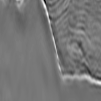

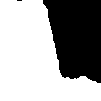

In [3]:
#This is how data looks. 
#The top is the what we need to seperate salt from sediment.
#The bottom is the mask or label we need to predict. 
display(X_images[10], y_images[10])

In [4]:
X.shape

(4000, 101, 101, 1)

In [5]:
X[10].shape

(101, 101, 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.5, shuffle = True)

C:\Users\uschlac\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
X_train.shape

(2000, 101, 101, 1)

In [8]:
K.clear_session

<function keras.backend.tensorflow_backend.clear_session()>

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    
    
    model = Sequential()
    model.add(Conv2D(1, kernel_size = (1,1), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
import keras.backend as KerasBackend

In [ ]:
def get_iou(y_true,y_pred):
    keras.backend.tf.metrics.mean_iou(y_true,y_pred,num_classes=101)

In [ ]:
keras.backend.tf.metrics.mean_iou

In [ ]:
K.clear_session()

In [ ]:
preds = model.predict(X_val)

In [ ]:
pred = np.multiply(preds[0], 255)

In [ ]:
cv2.imshow('sample',pred)


In [ ]:
cv2.destroyAllWindows()

In [ ]:
K.clear_session()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
preds = model.predict(X_val)
preds = np.multiply(preds, 255)

In [ ]:
preds[1301].max()
pred = preds[1301]

In [ ]:
cv2.imshow('l' , np.array(pred, dtype = np.uint8 ))

In [ ]:
cv2.destroyAllWindows()

In [ ]:
from IPython.display import Image
Image(filename=r"C:\Users\buckf\Documents\Practicum_2\Presentation_Photos\Network_Structure.JPG")

In [10]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    
    #Convolution 1:
    model.add(Conv2D(50, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    
    #Convolution 2:
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    model.add(ZeroPadding2D(padding=(1,1)))
    
    #Convolution 3
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Convolution 4
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Max-Pool 2
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    
    
    model.add(Conv2DTranspose(1, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(UpSampling2D(size=(3,3)))
    
    
    
    model.add(UpSampling2D(size=(3,3)))
    model.add(ZeroPadding2D(padding=(1,1)))
    
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 101, 101, 50)      500       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 101, 101, 50)      22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 50)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 35, 35, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 50)        22550     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 50)        22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 50)        0         
__________

In [14]:
preds = model.predict(X_val)

In [15]:
preds

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.2338571 ],
         [0.2338571 ],
         ...,
         [0.02833684],
         [0.02833684],
         [0.        ]],

        [[0.        ],
         [0.2338571 ],
         [0.2338571 ],
         ...,
         [0.02833684],
         [0.02833684],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [21]:
preds.astype(utf8)

NameError: name 'utf8' is not defined

In [24]:
pred = preds[0]

In [26]:
pred.dtype

dtype('float32')

In [36]:
pred = pred.astype('uint8')

In [37]:
pred = np.multiply(pred, 255)
pred.max()

254

In [ ]:
cv2.imshow('sample', pred)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
# score.py
import os
#import settings
from tqdm import tqdm
from skimage.io import imread
import numpy as np
import metrics
from keras.models import Model, load_model
from skimage.morphology import label
from skimage.transform import resize

# Settings
max_number_of_samples = 50 # this sets how many samples of the full training set to look at, this is not random, just the first N samples
model_file = "model-dsbowl2018-3.h5"
X_train_file = "X_train_256_256.npy"

# Define the object by object mean IOU calculation for a given image
def object_mean_iou(y_labeled_true, y_labeled_pred):
    num_y_labeled_true = y_labeled_true.max()
    num_y_labeled_pred = y_labeled_pred.max()
    threshold_ious = []
    for threshold in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        true_positives = 0
        false_negative = 0
        pred_obj_preload = []
        pred_obj_size = []
        for predicted_object_id in range(1, num_y_labeled_pred + 1):
            pred_obj = y_labeled_pred == predicted_object_id
            pred_obj_preload.append(pred_obj)
            pred_obj_size.append(np.count_nonzero(pred_obj))
        # a true positive for given threshold is when a _single_ object in the prediction corresponds to a given true object
        for true_object_id in range(1, num_y_labeled_true + 1):
            true_obj = y_labeled_true == true_object_id
            true_obj_size = np.count_nonzero(true_obj)
            matches = 0
            for predicted_object_id in range(1, num_y_labeled_pred + 1):
                # calculate the iou for this object and the true object
                this_pred_obj = pred_obj_preload[predicted_object_id-1]
                this_pred_obj_size = pred_obj_size[predicted_object_id-1]
                intersection = np.count_nonzero(true_obj & this_pred_obj)
                union = true_obj_size + this_pred_obj_size - intersection
                iou = intersection / union
                if iou > threshold:
                    matches += 1
            if matches == 1:
                true_positives += 1
            if matches == 0:
                false_negative += 1
        false_positive = num_y_labeled_pred - true_positives
        threshold_ious.append(true_positives / (true_positives + false_positive + false_negative))
    return sum(threshold_ious) / len(threshold_ious)

train_ids = next(os.walk(settings.TRAIN_PATH))[1][:max_number_of_samples]
# this is the 256x256 training data already loaded into a numpy array and resized
X_train = np.load(X_train_file)[:max_number_of_samples]
# this is the true sizes of the training images for upsampling the masks after prediction
sizes_train = np.load("sizes_train.npy")

# Get and resize train images and masks
Y_labeled_true = []
IMG_CHANNELS = settings.IMG_CHANNELS
print('Loading true masks ...')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = settings.TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.bool)
    next_object_number = 1
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = next_object_number * (np.expand_dims(mask_, axis=-1) // 255)
        mask = np.maximum(mask, mask_)
        next_object_number += 1
    Y_labeled_true.append(np.squeeze(mask, -1))

# Use the same labeling methodology here that you use before submitting
model = load_model(model_file, custom_objects={"mean_iou": metrics.mean_iou, "mean_iou2": metrics.mean_iou2})
preds_train = model.predict(X_train, verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_train_t)):
    preds_test_upsampled.append(resize(np.squeeze(preds_train_t[i]), 
                                       (sizes_train[i][0], sizes_train[i][1]), 
                                       mode='constant', preserve_range=True))
Y_labeled_pred = [label(pred) for pred in preds_test_upsampled]

images_iou = []
for n in range(len(Y_labeled_true)):
    image_iou = object_mean_iou(Y_labeled_true[n], Y_labeled_pred[n])
    print("Image " + str(n) + " IOU: " + str(image_iou))
    images_iou.append(image_iou)
print("mIOU (LB) Score: " + str(sum(images_iou) / len(images_iou)))


In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))